In [1]:
%load_ext autoreload
%autoreload 2
import torch
from torch.optim import Adam
from matplotlib import pyplot as plt
from src.utils import get_mnist_data, get_device
from src.models import ConvNN
from src.training_and_evaluation import *
from src.attacks import gradient_attack
from torch.nn.functional import cross_entropy
from typing import Tuple
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# Project 2, part 2: Adversarial training 
In this notebook we perform adversarial training on the convolutional neural network from Part 1.

## Your task
Complete the missing code in this notebook. Make sure that all the functions follow the provided specification, i.e. the output of the function exactly matches the description in the docstring. 

Specifically, for this part you will have to implement the following functions / classes:  

**This notebook**
* The `loss_function_adversarial_training` used for adversarial training. 

## General remarks

Do not add or modify any code outside of the following comment blocks, or where otherwise explicitly stated.

``` python
##########################################################
# YOUR CODE HERE
...
##########################################################
```
After you fill in all the missing code, restart the kernel and re-run all the cells in the notebook.

The following things are **NOT** allowed:
- Using additional `import` statements
- Copying / reusing code from other sources (e.g. code by other students)

Note that plagiarising even a single project task will make you ineligible for the bonus this semester.

In [2]:
mnist_trainset = get_mnist_data(train=True)
mnist_testset = get_mnist_data(train=False)
device = get_device()

model = ConvNN()
model.to(device)

epochs = 2
batch_size = 128
test_batch_size = 1000  # feel free to change this
lr = 1e-3

opt = Adam(model.parameters(), lr=lr)

attack_args = {'norm': "2", "epsilon": 5}

### Loss function



In [3]:
losses, accuracies = train_model(model, mnist_trainset, batch_size, device,
                                 loss_function=loss_function_adversarial_training, optimizer=opt, 
                                 loss_args=attack_args, epochs=epochs)

INFO:root:Epoch 0 Iteration 0: Loss=2.3894126415252686 Accuracy=0.109375
INFO:root:Epoch 0 Iteration 100: Loss=0.3924005925655365 Accuracy=0.8671875
INFO:root:Epoch 0 Iteration 200: Loss=0.22464746236801147 Accuracy=0.921875
INFO:root:Epoch 0 Iteration 300: Loss=0.23131296038627625 Accuracy=0.921875
INFO:root:Epoch 0 Iteration 400: Loss=0.10862760990858078 Accuracy=0.96875
INFO:root:Epoch 1 Iteration 0: Loss=0.1778782606124878 Accuracy=0.96875
INFO:root:Epoch 1 Iteration 100: Loss=0.051283929497003555 Accuracy=0.9765625
INFO:root:Epoch 1 Iteration 200: Loss=0.09083348512649536 Accuracy=0.9609375
INFO:root:Epoch 1 Iteration 300: Loss=0.08808605372905731 Accuracy=0.9609375
INFO:root:Epoch 1 Iteration 400: Loss=0.07121876627206802 Accuracy=0.984375


In [4]:
torch.save(model.state_dict(), "models/adversarial_training.checkpoint")

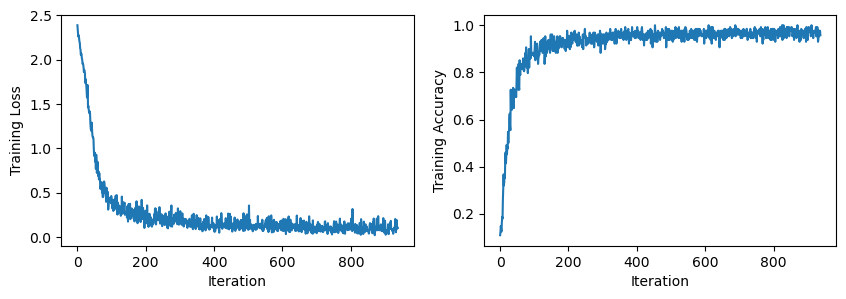

In [5]:
fig = plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.subplot(122)
plt.plot(accuracies)
plt.xlabel("Iteration")
plt.ylabel("Training Accuracy")
plt.show()

In [6]:
clean_accuracy = predict_model(model, mnist_testset, batch_size, device,
                               attack_function=None)

In [7]:
perturbed_accuracy = predict_model(model, mnist_testset, test_batch_size, device, 
                                   attack_function=gradient_attack, 
                                   attack_args=attack_args)

In [8]:
clean_accuracy

0.9721999764442444

In [9]:
perturbed_accuracy

0.028300000354647636